## Time Series Data Analysis with Statsmodels
In this task, the statsmodel  is used to analysis the air passenger dataset. The dataset consists of montly passenger counts from year 1949 to 1960. The motivation behind this task is to explore the statsmodel for time series analysis.  The Holt-Winter methods is introuduced for forecasting the passenger.

In [123]:
# import necessary libraries
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.metrics import mean_squared_error,mean_absolute_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [185]:
#load dataset
df = pd.read_csv('airline_passengers.csv', index_col= 'Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Plot dataset

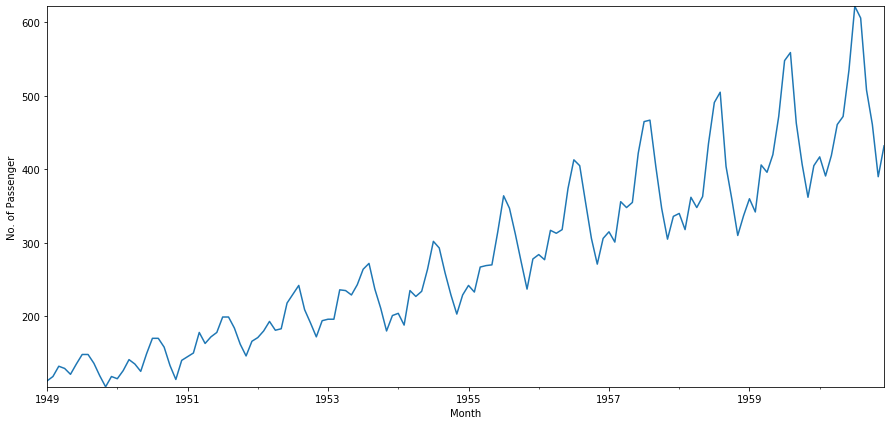

In [186]:
#create plot 
ax = df['Thousands of Passengers'].plot(figsize=(15,7))
ax.autoscale(axis='both',tight=True)
ax.set(ylabel='No. of Passenger');

From the chart above, it clearly shows that there is trend and seasonality. Lets do it by showing with seaonal_decompostion. 

### ETS( Error/Trend/Seasonality) Models

Lets look the trend, seaonality in the dataset. Sesonal decompose takes 'additive' and 'multiplicative' model. Additive is used when there is linear relationship while multiplicative is used in exponential relationship.

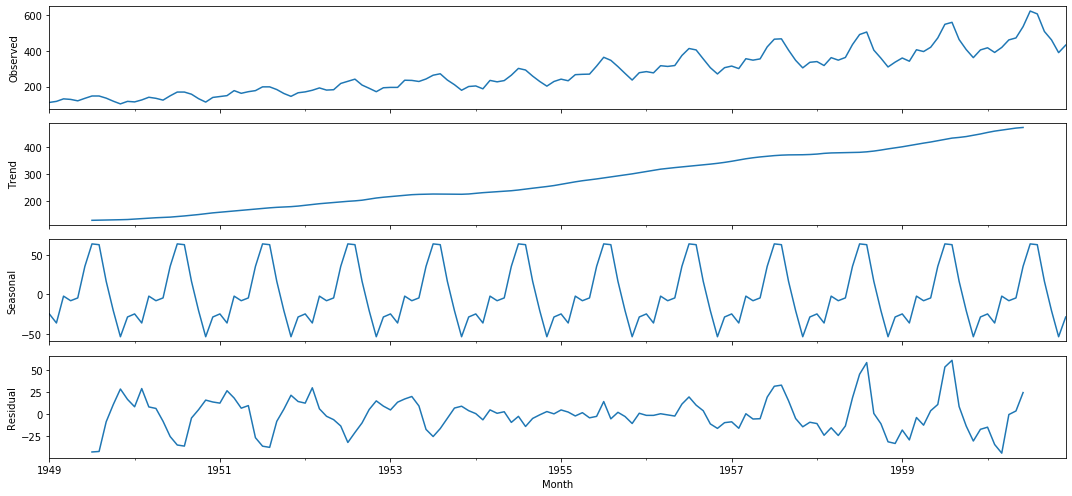

In [187]:
#create seasonal decomposition
rcParams['figure.figsize']=15,7 # set figure size
result_decompose = seasonal_decompose(df['Thousands of Passengers'], model='additive')  
result_decompose.plot();

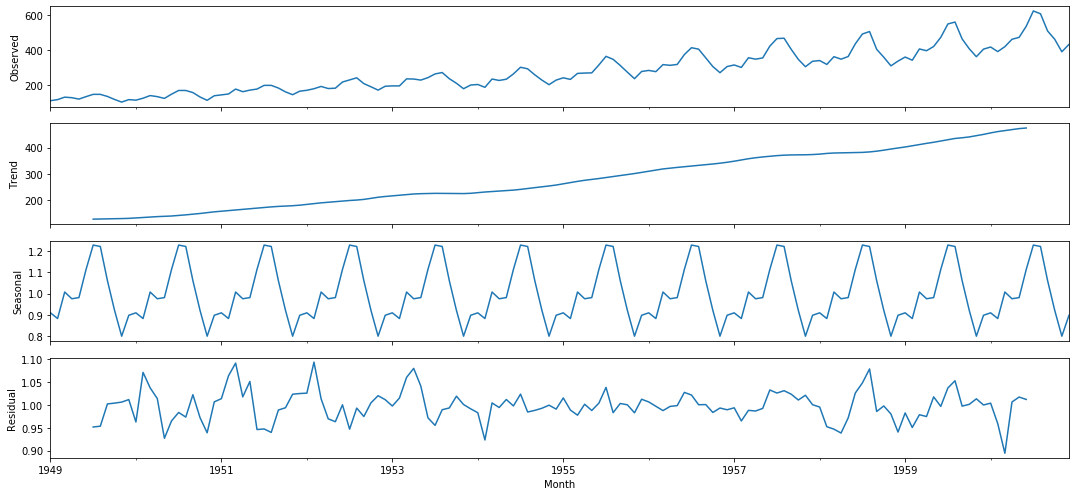

In [188]:
#create with multiplicative
rcParams['figure.figsize']=15,7 # set figure size
result_decompose = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')  
result_decompose.plot();

### MA(Moving Averages)
Moving averages do  the mean calculation from  certain previous rows(given window size). 

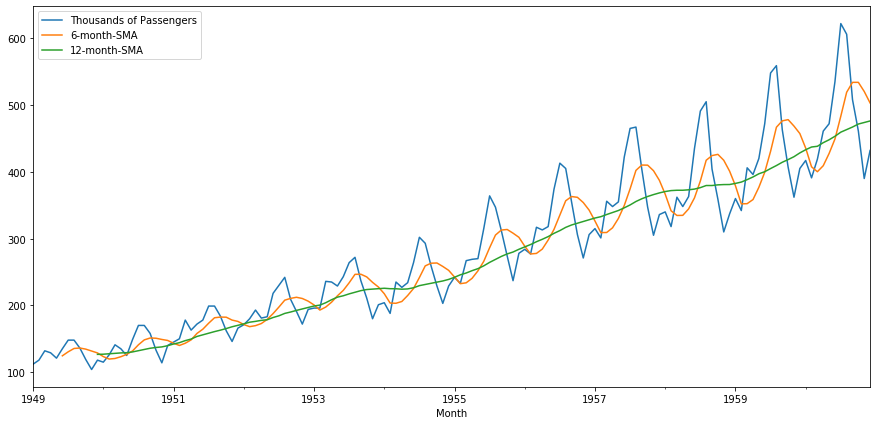

In [189]:
#creates mean of 6month and 12 month
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

#plot
df.plot();

### EWMA(Exponentially Weighted Moving Average)
EWMA allow to reduce the lag effect from SMA and puts more weight on values that occured more recently.

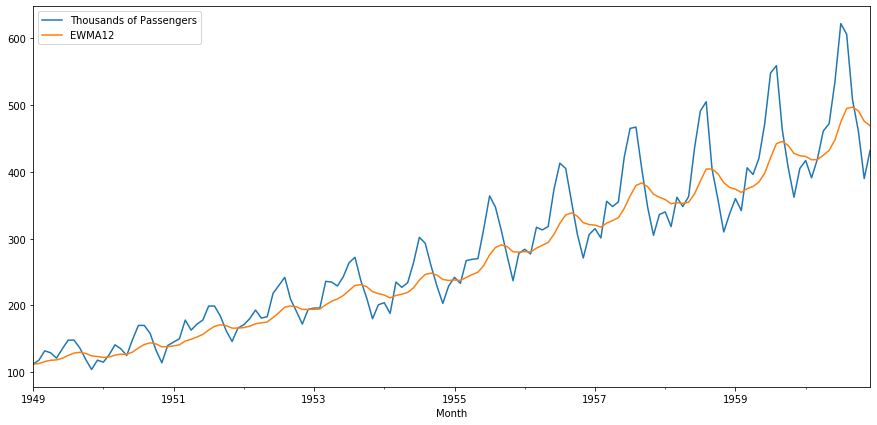

In [190]:
#create simple expotential smoothing
df['EWMA12'] = df['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
df[['Thousands of Passengers','EWMA12']].plot();

### Comparing SMA to EWMA
Lets compare between SMA and EWMA, which one do better!

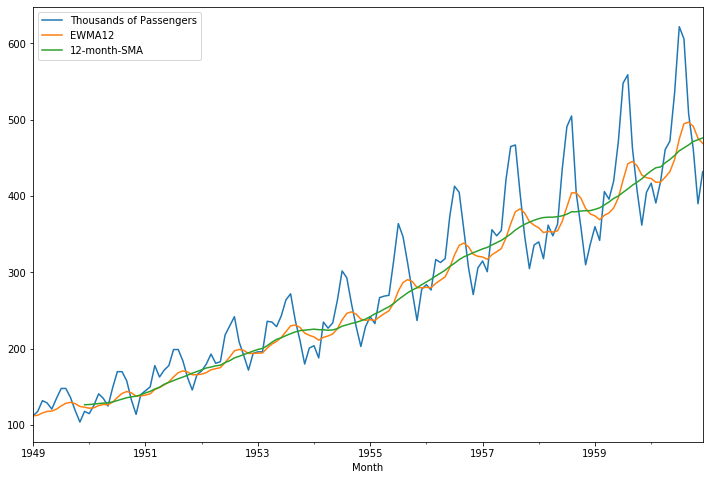

In [191]:
# create plot
ax = df[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8))
ax.autoscale(axis='x',tight=True);

### Holt-Winters Methods
In this section, single, double and triple exponential smoothing factors are introuduced.

In [193]:
#creates datatime index frequency (holt-winter method requires)
df.index.freq = 'MS' # since data start with each month
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### SimpleExpSmoothing
This method use one simple smoothing factor $\alpha$ (alpha). Panda .ewm() and SimpleExpSmoothing() from statsmodel  are same.

In [194]:
#set paramters
span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
model_ses = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False)
df['SES12'] = model_ses.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


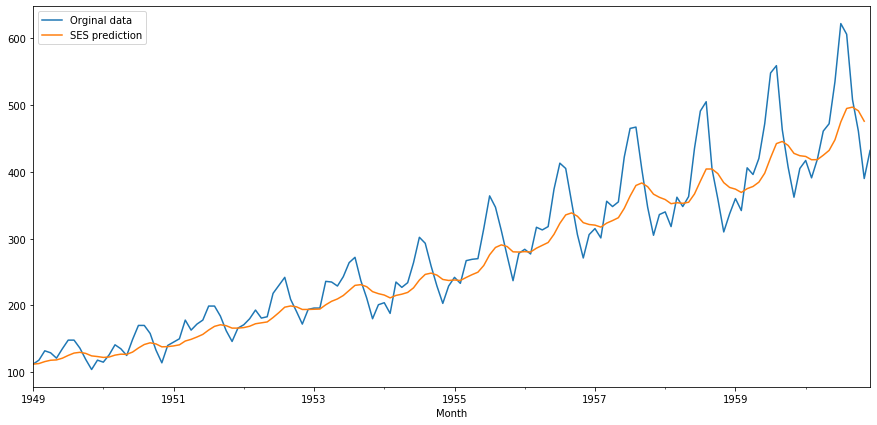

In [195]:
# create plots
df['Thousands of Passengers'].plot(legend=True, label='Orginal data')
df['SES12'].plot(legend=True, label='SES prediction', figsize=(15,7))

### Double Exponential Smoothing
This method is called as holt-method. It adds second smoothing factor $\beta$ (beta) that addresses trends in the data.

In [196]:
# with additive  trend
model_des_add= ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit()
df['DESadd12'] = model_des_add.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336672
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336672
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336672
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336672
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336672


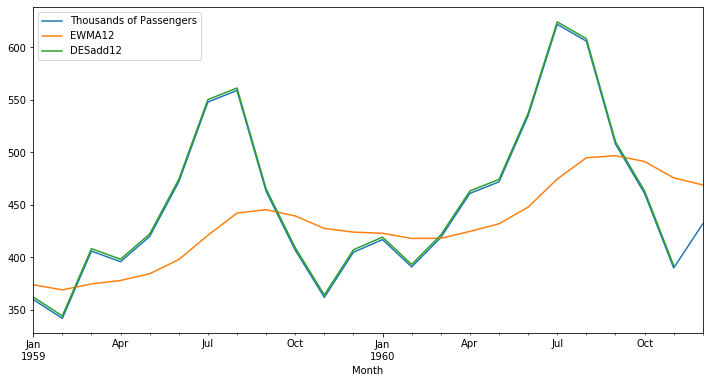

In [210]:
#create plot recent 24 months
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[-24:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot, it shows 'double exponential smoothing' fits the data better than 'simple exp smoothing'.

In [204]:
# lets try with multiplicative trend
model_des_mul = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit()
df['DESmul12'] = model_des_mul.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336672,112.049247
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336672,118.051885
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336672,132.058041
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336672,129.056722
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336672,121.053204


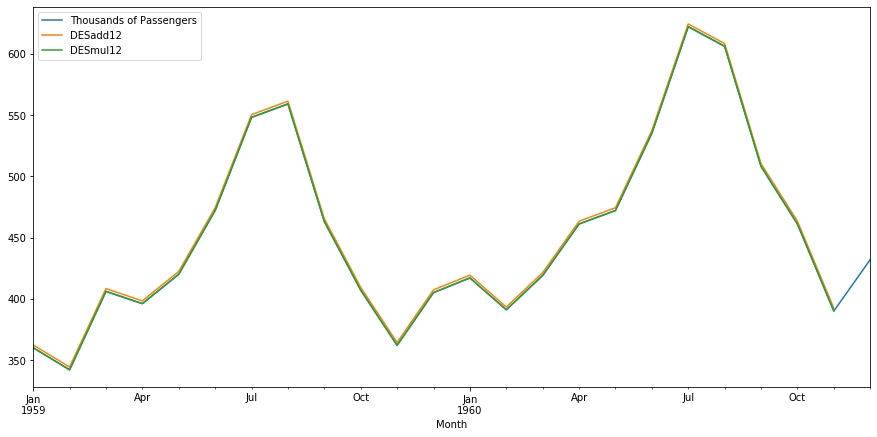

In [205]:
# compare the plot with additive and multiplicative 
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[-24:].plot(figsize=(15,7)).autoscale(axis='x',tight=True);

It shows that both the multiplicative and additive trend fit better in this dataset

### Triple Exponential Smoothing
This  method is known as Holt-Winters that adds support for both trends and seasonality in the data. The extra smoothing factor $\gamma$ is added on double Exponential Smoothing method.


In [206]:
#create model
model_trip_add = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['TESadd12'] = model_trip_add.fittedvalues
df.head()

/Users/gangalingden/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336672,112.049247,113.081288
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336672,118.051885,120.550747
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336672,132.058041,135.527329
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336672,129.056722,133.155064
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336672,121.053204,125.656114


In [207]:
#create using multiplicative trend and season
model_trip_mul= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
df['TESmul12']= model_trip_mul.fit().fittedvalues
df.head()


,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.336672,112.049247,113.081288,111.620925
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.336672,118.051885,120.550747,118.857726
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.336672,132.058041,135.527329,133.348021
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.336672,129.056722,133.155064,127.907733
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.336672,121.053204,125.656114,120.987070


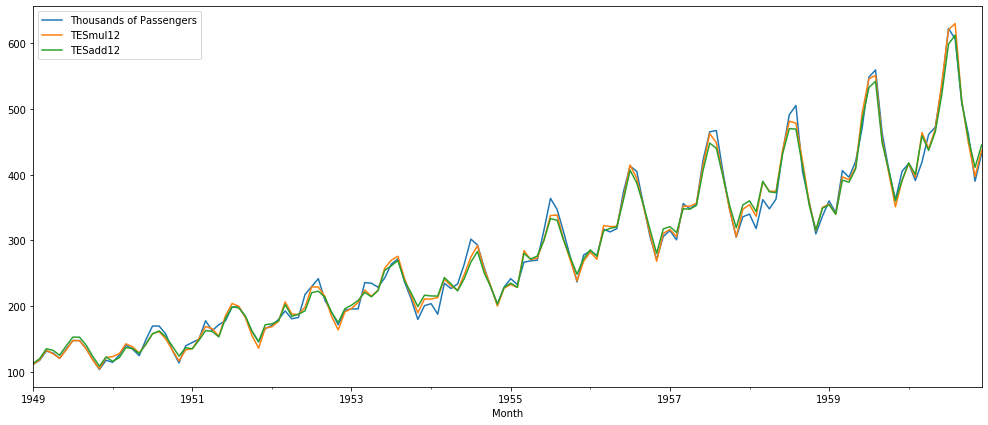

In [211]:
#create plots
ax = df[['Thousands of Passengers','TESmul12','TESadd12']].plot(figsize=(17,7));
ax.autoscale(axis='x',tight=True)

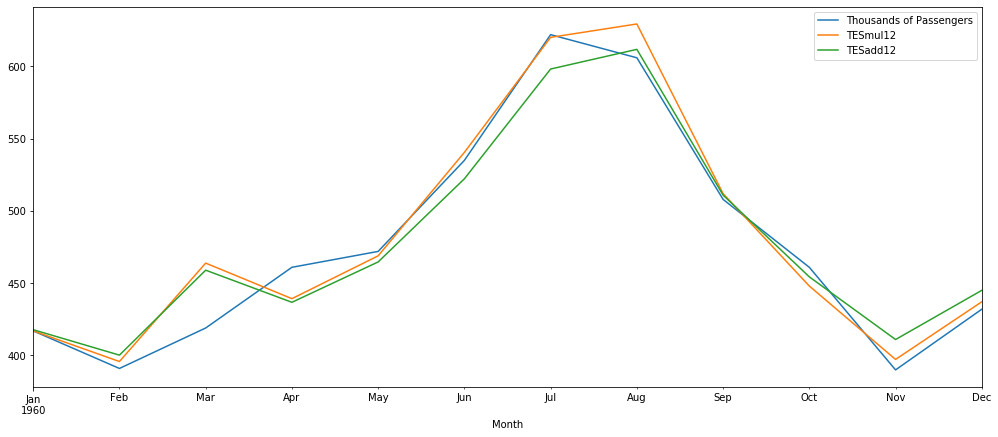

In [212]:
#create plots latest 12 months
ax = df[['Thousands of Passengers','TESmul12','TESadd12']].iloc[-12:].plot(figsize=(17,7));
ax.autoscale(axis='x',tight=True)

Based on the plots(double and triple exponential), it shows that triple exponential smoothing in this dataset doesn't fit well in compare to double eponential smoothing.

### Compare Simple Exponential Smoothing(Simple moving average), Double Exponential Smoothing(Holt's method), Triple Exponential Smoothing (Holt-Winters Method)

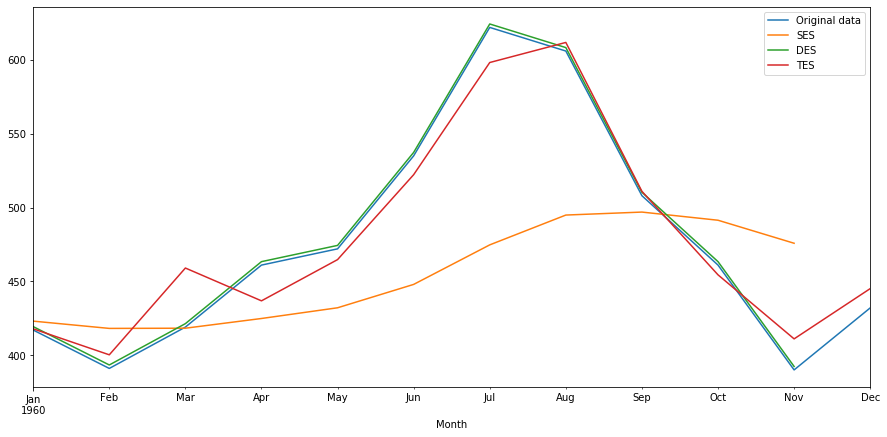

In [225]:
#create plots of three Exponential Smoothing methods
df['Thousands of Passengers'].iloc[-12:].plot(legend= True, label='Original data')
df['SES12'].iloc[-12:].plot(legend= True, label= 'SES')
df['DESadd12'].iloc[-12:].plot(legend= True, label= 'DES')
df['TESadd12'].iloc[-12:].plot(legend= True, label= 'TES', figsize=(15,7));

#### Observation: 
In this dataset, the double  exponential fit very well in compare to other. simple exponent is the worst fit line.


### Forcasting
Lets do forecasting with holt-winter methods(triple exponential  smoothing)

In [215]:
# split train and test data
train_data = df.iloc[:108] 
test_data = df.iloc[108:] # last 36 months

In [116]:
#fit model with yearly(12 months seasonal periods)
model_holt_winter_mul = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', 
                                         seasonal= 'mul', seasonal_periods= 12).fit()


In [117]:
# predict the test data(either using forecast or predict)

#predicitons = model_holt_winter.predict(start= test_data.index[0], end = test_data.index[-1])
predictions = model_holt_winter_mul.forecast(36) # we have 36 test observation
predictions.head()

1958-01-01    356.738900
1958-02-01    343.560934
1958-03-01    403.996376
1958-04-01    397.853033
1958-05-01    406.415331
Freq: MS, dtype: float64

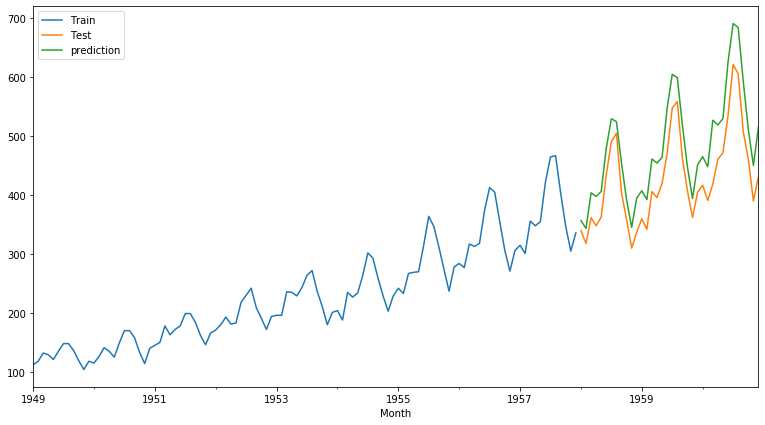

In [124]:
#plot the results
train_data['Thousands of Passengers'].plot(legend = True, label = 'Train')
test_data['Thousands of Passengers'].plot(legend = True, label = 'Test', figsize=(13,7))
predictions.plot(legend = True, label = 'prediction');

### Lets try with additive trend

In [119]:
# fit model
model_holt_winter_add = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='add', 
                                         seasonal= 'add', seasonal_periods= 12).fit()
predi_add = model_holt_winter_add.forecast(36)# we have 36 test observation


/Users/gangalingden/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


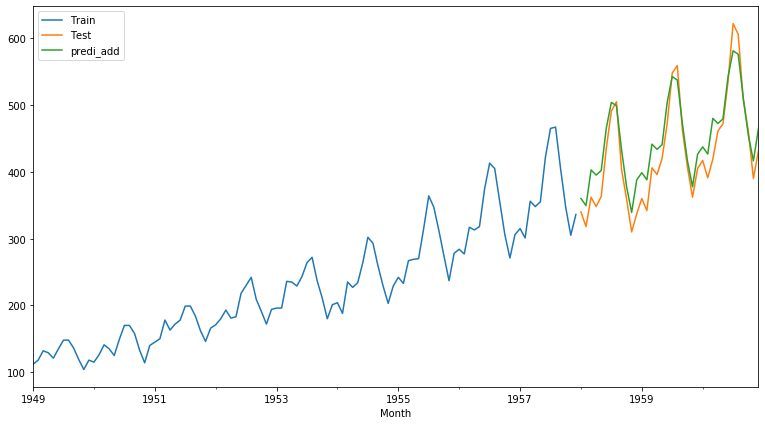

In [125]:
#plot the results
train_data['Thousands of Passengers'].plot(legend = True, label = 'Train')
test_data['Thousands of Passengers'].plot(legend = True, label = 'Test', figsize=(13,7))
predi_add.plot(legend = True, label = 'predi_add');

Based on two plots above, the additive trend looks better, but lets calculate the metric for evalution

### Model Evaluation

In [135]:
# mul trend
mean_absolute_error(test_data, predictions )

53.161447399489766

In [136]:
#add trend
mean_absolute_error(test_data, predi_add)

25.889941646758743

In [137]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


The model predicts test data  pretty well that we can observe from the test describtion. The abosulte mean error remain pretty close the standard deviation of test data meaning that the dispersion of data test and prediction is prety close.  Model with additive trend did well.

### Forecasting for Future

In [144]:
# train model with whole dataset
model_final = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', 
                                    seasonal_periods=12).fit()
future_forcast = model_final.forecast(24) # forecast next 24 months

/Users/gangalingden/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


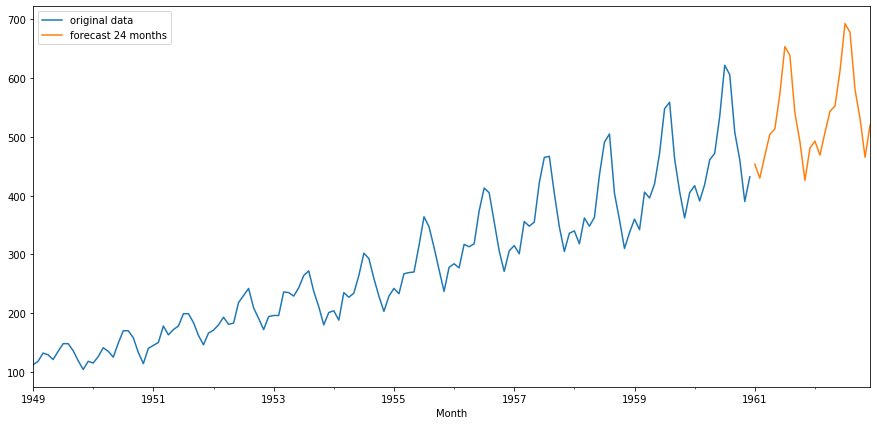

In [147]:
# plots the forcast
df['Thousands of Passengers'].plot(legend= True, label= 'original data')
future_forcast.plot(legend= True, label= 'forecast 24 months', figsize=(15,7));

### Compare Forecast from three method(SES, DES, TES)

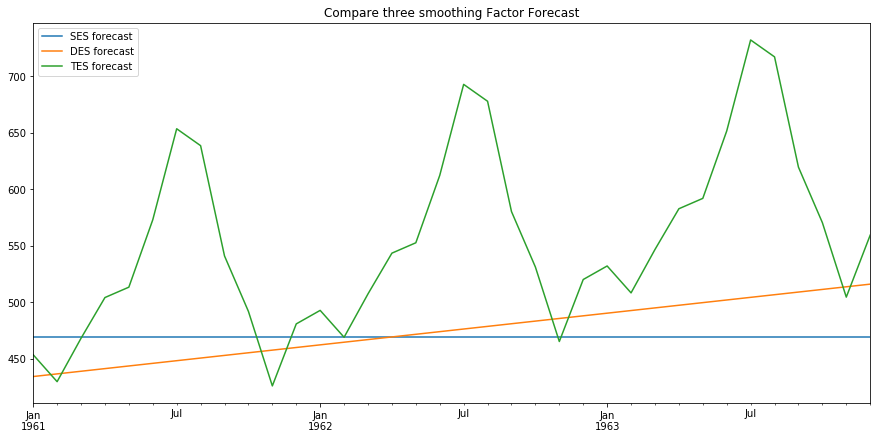

In [228]:
#forecst next 36 months
prediction_ses = model_ses.forecast(36)
prediciotn_des = model_des.forecast(36)
prediction_tes = model_final.forecast(36)

#creates plots
prediction_ses.plot(legend= True, label= 'SES forecast')
prediciotn_des.plot(legend= True, label= 'DES forecast')
prediction_tes.plot(legend= True, label= 'TES forecast', figsize=(15,7), title= 'Compare three smoothing Factor Forecast');


#### Onservation:
Simple Exponential Smooting (SES) has horizontal line forecast, Double Exponential Smoothing(DES) has straight line forecast with slope while Triple Exponential Smoothing has best looking forecast in compare to others.